# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: US State Data

## Import Data

In [1]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD,DMDc
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px

In [2]:
# import csse_covid_19_daily_reports

# create data frame:
# list of states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


statesA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [3]:
# add later date data

rowsum = pd.DataFrame()
stateData = pd.DataFrame()
threshold = 2; # threshold for minimum number of days cutoff

In [4]:
start_date = date(2020, 1, 22)
end_date = date(2020, 1, 31)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            if (np.transpose(rowSum).Confirmed.all()>=threshold): #for threshold
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False): #for threshold
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)

In [5]:
start_date = date(2020, 2, 1)
end_date = date(2020, 3, 9)

for single_date in pd.date_range(start_date, end_date):
    stateIter = iter(states)
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)

    for state in statesA:
        stateName = next(stateIter)
        totalInState = daily.loc[daily['Country/Region'] == 'US']
        totalInState = totalInState.loc[totalInState['Province/State'].str.contains(state)]
        if totalInState.empty == False:
            title = totalInState.loc[:,'Province/State':'Province/State']
            title = title.iloc[[0],:]
            title.at[:,'Province/State']= stateName
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            if (np.transpose(rowSum).Confirmed.all()>=threshold):
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False):
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)

In [6]:
start_date = date(2020, 3, 10)
end_date = date(2020, 3, 21)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if (totalInState.empty == False):
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                if (np.transpose(rowSum).Confirmed.all()>=threshold):
                    newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False):
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)


In [7]:
start_date = date(2020, 3, 22)
end_date = end_date = datetime.date(datetime.now())

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    try:
        daily = pd.read_csv(url, error_bad_lines=False)
        for state in states:
            totalInState = daily.loc[daily['Province_State'] == state]
            title = totalInState.loc[:,'Province_State':'Province_State']
            if totalInState.empty == False:
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                if (np.transpose(rowSum).Confirmed.all()>=threshold):
                    newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
        if (newStateData.empty == False):
            newStateData = newStateData.set_index('Province_State').drop(columns=['index'])
            stateData = pd.concat([stateData,newStateData],axis=1)
    except:
        print('Todays file has not yet been uploaded')

Todays file has not yet been uploaded


In [8]:
stateData = stateData.fillna(0)
stateData

,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,...,04-10-2020,04-11-2020,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020,04-19-2020
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,157,196,242,381,517,587,694,825,899,987,...,2947,3217,3563,3734,3953,4075,4345,4571,4712,4888
Alaska,20,30,34,41,56,58,85,102,114,119,...,246,257,272,277,285,293,300,309,314,319
Arizona,152,235,326,401,508,665,773,919,1157,1289,...,3112,3393,3542,3705,3809,3964,4237,4511,4724,4933
Arkansas,165,192,219,280,335,381,409,426,473,523,...,1171,1228,1280,1410,1498,1569,1620,1695,1744,1781
California,1646,2108,2538,2998,3899,4657,5095,5852,7138,8210,...,21081,21706,22795,23931,25356,26686,27677,29157,30491,31431
Colorado,591,704,723,1021,1430,1433,1740,2307,2311,2966,...,6202,6513,7307,7691,7950,7956,8286,8691,9047,9730
Connecticut,327,415,618,875,1012,1291,1524,1993,2571,3128,...,10538,11510,12035,13381,13989,14755,15884,16809,17550,17962
Delaware,56,68,104,119,130,163,214,232,264,319,...,1326,1479,1625,1758,1926,2014,2070,2317,2538,2538
Florida,1004,1227,1412,1682,2357,2900,3763,4246,5473,6741,...,17531,18494,19895,21019,21628,22511,23343,24759,25492,26314


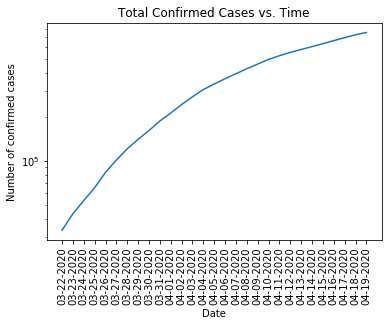

In [9]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

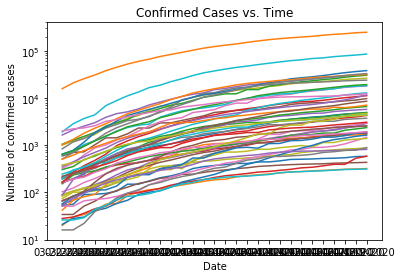

In [11]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(np.transpose(stateData.loc[:,'01-22-2020':]))

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')


plt.show()

## Convert Data into an Array

In order to make most initial conditions greater than zero, the start date was chosen to be that in which all states reach an indicated threshold.  This will increase the accuracy of the reconstruction in time.

In [12]:
# Select data with few initial conditions of 0
scaledData = stateData
# Convert data to array
scaledData = scaledData.to_numpy()
scaledData

array([[ 157,  196,  242, ..., 4571, 4712, 4888],
       [  20,   30,   34, ...,  309,  314,  319],
       [ 152,  235,  326, ..., 4511, 4724, 4933],
       ...,
       [  16,   16,   22, ...,  775,  785,  890],
       [ 381,  425,  481, ..., 4053, 4199, 4346],
       [  26,   26,   29, ...,  305,  309,  313]], dtype=int64)

## Take DMD

**Modes**: Columns are the low-rank structures individuated


**Dynamics**: Rows refer to the time evolution of each mode


**Eigs**: eigenvalues of the low dimensional operator

* If an eigenvalue is on the unit circle, the corresponding mode will be stable; while if an eigenvalue is inside or outside the unit circle, the mode will converge or diverge, respectively.

**Reconstructed_data**: the approximated system evolution

### DMD

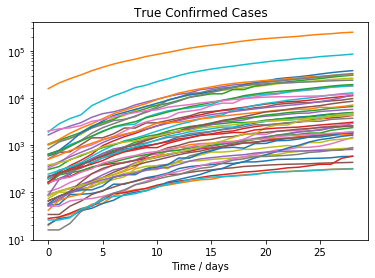

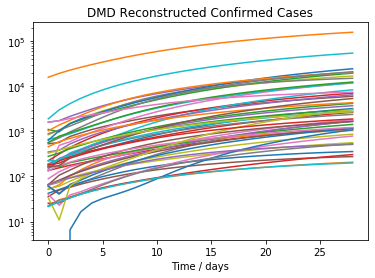

In [37]:
dmd = DMD(svd_rank=6) # truncated SVD
dmd.fit(scaledData)

# plot true data
plt.title('True Confirmed Cases')
plt.plot(scaledData.T)
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

# plot dmd reconstructed data
plt.title('DMD Reconstructed Confirmed Cases')
plt.plot(dmd.reconstructed_data.real.T)
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

Eigenvalue (-0.2871349679865942+0j): distance from unit circle 0.9175535101593375
Eigenvalue (1.013928017662609+0j): distance from unit circle 0.028050025001228107
Eigenvalue (0.9870004699672166+0.05714081225011925j): distance from unit circle 0.022564999859890245
Eigenvalue (0.9870004699672166-0.05714081225011925j): distance from unit circle 0.022564999859890245
Eigenvalue (0.6916992755833897+0.26927997304303536j): distance from unit circle 0.4490404082753561
Eigenvalue (0.6916992755833897-0.26927997304303536j): distance from unit circle 0.4490404082753561


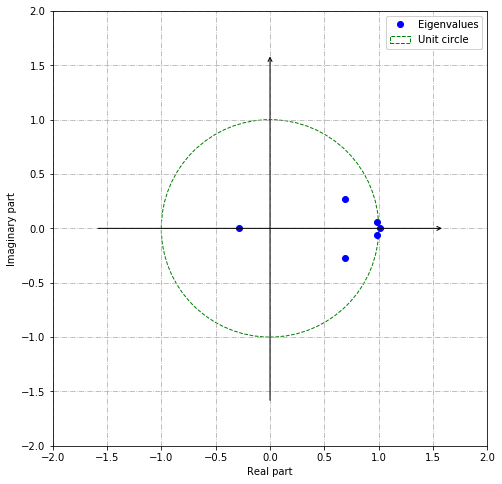

In [38]:
# eigenvalues of low dim operator

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

The eigenvalues are discrete, so their placement corresponds to the time sequences below:

![title](img/rootLocusPoleLocations.PNG)

All eigenvalues inside of the unit circle converge to a final value, while the eigenvalues outside of the unit circle are unstable (do not converge).  The unstable eigenvalues correspond to unstable modes.  Most eigenvalues are located on the positive real axis, corresponding to low frequency dynamics.

Eigenvalue -1.2478029020353172, 3.141592653589793
Eigenvalue 0.013831914150775592, 0.0
Eigenvalue -0.011411742676961326, 0.057828849603946665
Eigenvalue -0.011411742676961326, -0.057828849603946665
Eigenvalue -0.2980469043856858, 0.3712501579616352
Eigenvalue -0.2980469043856858, -0.3712501579616352


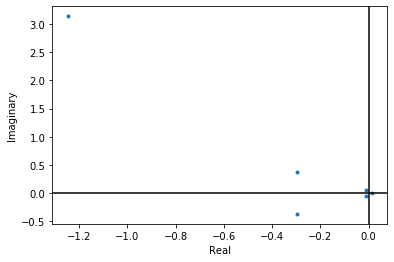

In [55]:
# Continuous Eigenvalues

plt.plot(np.log(dmd.eigs).real,np.log(dmd.eigs).imag,'.')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Real')
plt.ylabel('Imaginary')

for eig in dmd.eigs:
    print('Eigenvalue {}, {}'.format(np.log(eig).real, np.log(eig).imag))

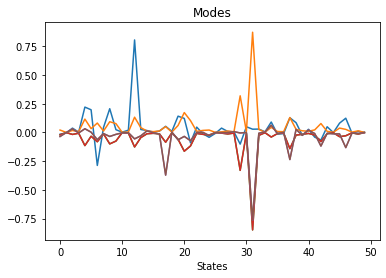

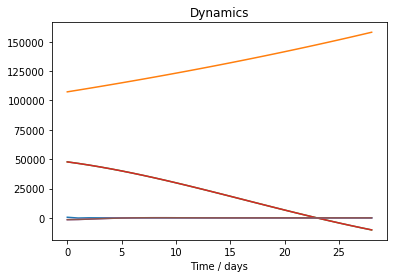

In [33]:
# modes
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
    plt.xlabel('States')
plt.show()

# dynamics
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
    plt.xlabel('Time / days')
plt.show()

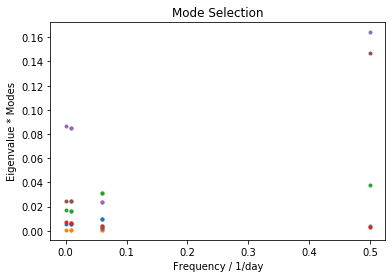

In [34]:
# Mode Selection

# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)

i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


In [35]:
# Modes map

dmd = DMD(svd_rank=1)
dmd.fit(scaledData) # transpose so snapshots (state data) are arranged by column


with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = dynamic.real
fig = px.choropleth(df,    locations=statesA,  
                           locationmode="USA-states",
                           color=abs(dmd.modes.real),
                           range_color=(0,0.9),
                           scope="usa",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### DMDc

Since we want to add the control, the evolution of the complex system can be formally summarized as:$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k,
$$where the operators $\mathbf{A}$ and $\mathbf{B}$ are the ones we will approximate using DMD.

In [47]:
dmdc = DMDc()
dmdc.fit(scaledData, np.zeros(28))

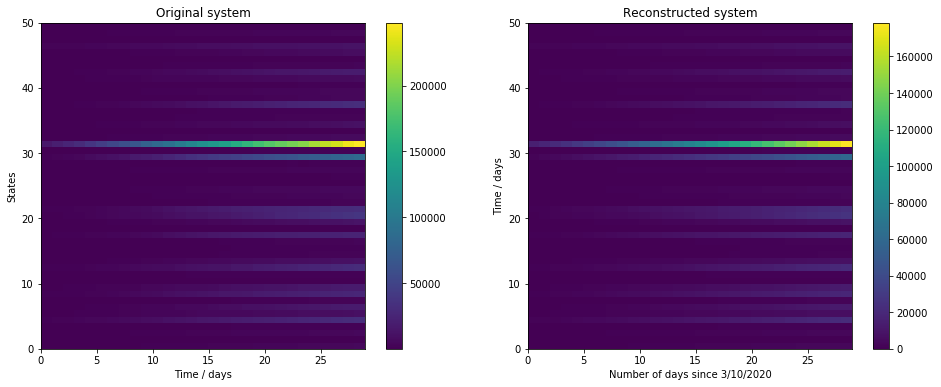

In [48]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Original system')
plt.xlabel('Time / days')
plt.ylabel('States')
plt.pcolor(scaledData)
plt.colorbar()

plt.subplot(122)
plt.title('Reconstructed system')
plt.xlabel('Number of days since 3/10/2020')
plt.ylabel('Time / days')
plt.pcolor(dmdc.reconstructed_data().real)
plt.colorbar()

plt.show()

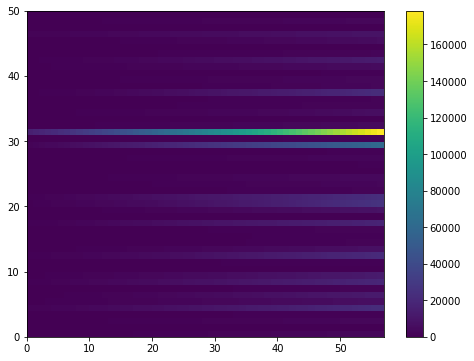

In [49]:
dmdc.dmd_time['dt'] = .5
u = np.random.rand(1,1)-.5
new_u = np.random.rand(u.shape[0], dmdc.dynamics.shape[1]-1)

plt.figure(figsize=(8,6))
plt.pcolor(dmdc.reconstructed_data(new_u).real)
plt.colorbar()
plt.show()